In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-np.pi, np.pi, 1000)
y = (np.pi - np.abs(x)) ** 10

offset = 100
noise = 10
R0 = y[offset:]
L0 = y[:-offset]
yR = np.random.normal(loc=R0, scale=noise)
yL = np.random.normal(loc=L0, scale=noise)
ys = yR + yL
yd = yR - yL

c0 = np.max(R0 + L0)

(-205742.6651131386, 205742.6651131386)

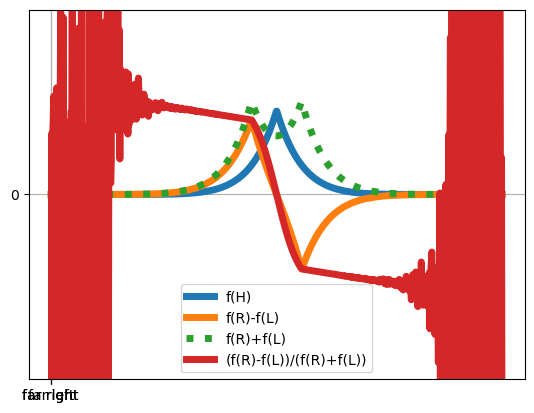

In [3]:
plt.plot(y[offset // 2:-offset // 2], lw=5, label='f(H)')
plt.plot(yd, lw=5, label='f(R)-f(L)')
plt.plot(ys, lw=5, ls='dotted', label='f(R)+f(L)')
plt.plot(yd/ys*c0, lw=5, label='(f(R)-f(L))/(f(R)+f(L))')

plt.legend()
plt.grid()
plt.xticks([0, (100 - offset) // 2 - 1, 99 - offset], ['far left', 'correct', 'far right'])
plt.yticks([0])
# plt.yticks([-100, 0, 100, 200], [-1, 0, 1, 2])
plt.ylim(-c0 * 2, c0 * 2)

(-113158.46581222623, 113158.46581222623)

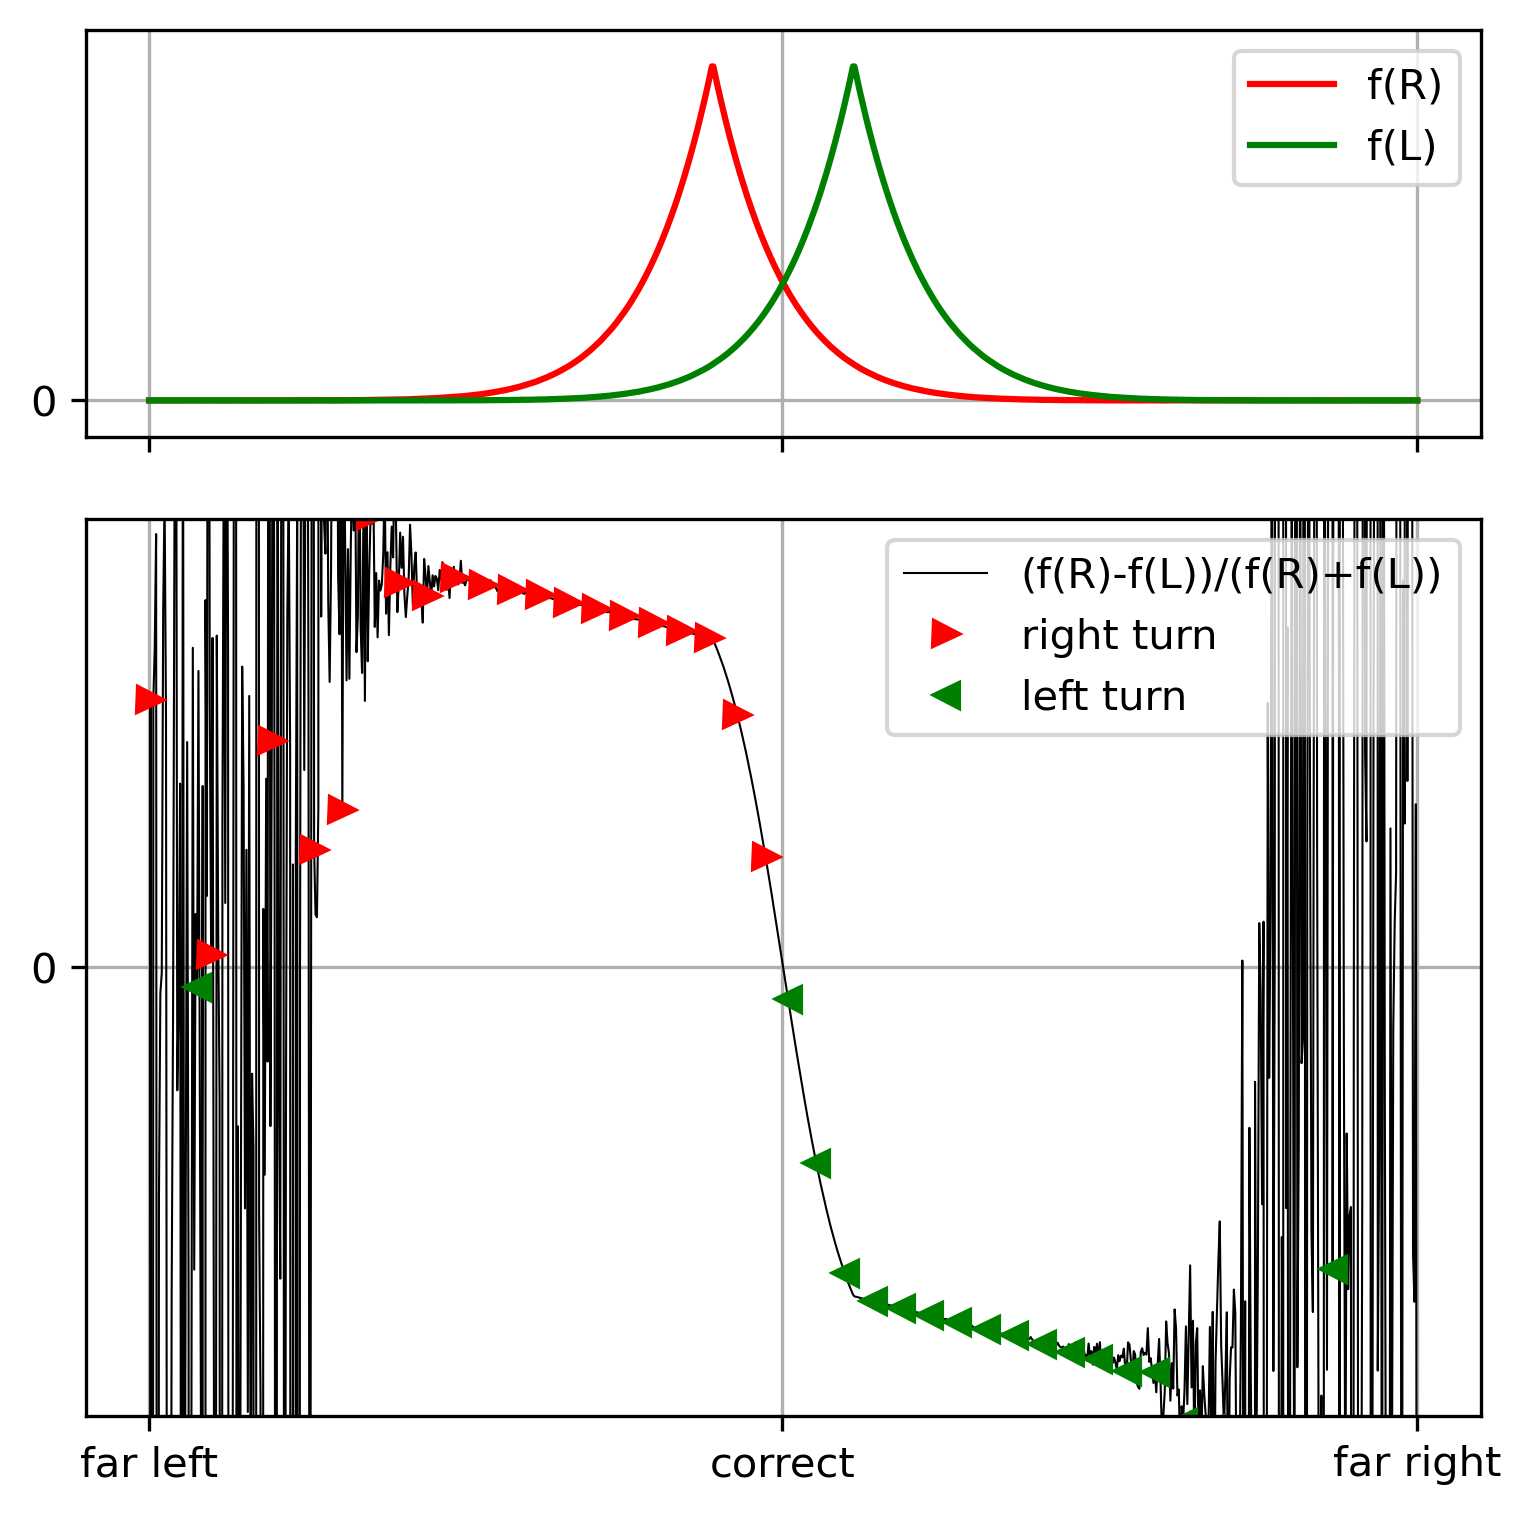

In [4]:
fig, ax = plt.subplot_mosaic('''a
                                b
                                b''', figsize=(6, 6), dpi=300, sharex=True)

ax['a'].plot(yR, label='f(R)', c='r')
ax['a'].plot(yL, label='f(L)', c='g')

marker_sparsity = 20
rotation = yd/ys*c0
ax['b'].plot(rotation, c='k', lw=0.5, label='(f(R)-f(L))/(f(R)+f(L))')
ax['b'].plot(np.arange(900)[rotation>0][::marker_sparsity], rotation[rotation>0][::marker_sparsity], c='r', marker='>', ls='none', label='right turn')
ax['b'].plot(np.arange(900)[rotation<0][::marker_sparsity], rotation[rotation<0][::marker_sparsity], c='g', marker='<', ls='none', label='left turn')

for a in ax.values():
    a.legend()
    a.grid()
    a.set_yticks([0])
    # plt.yticks([-100, 0, 100, 200], [-1, 0, 1, 2])
    a.set_xticks([0, (1000 - offset) // 2 - 1, 999 - offset], ['far left', 'correct', 'far right'])
    
    

ax['a'].set_ylim(-c0/10, c0)
ax['b'].set_ylim(-c0*1.1, c0*1.1)

Text(0, 0.5, 'turning signal')

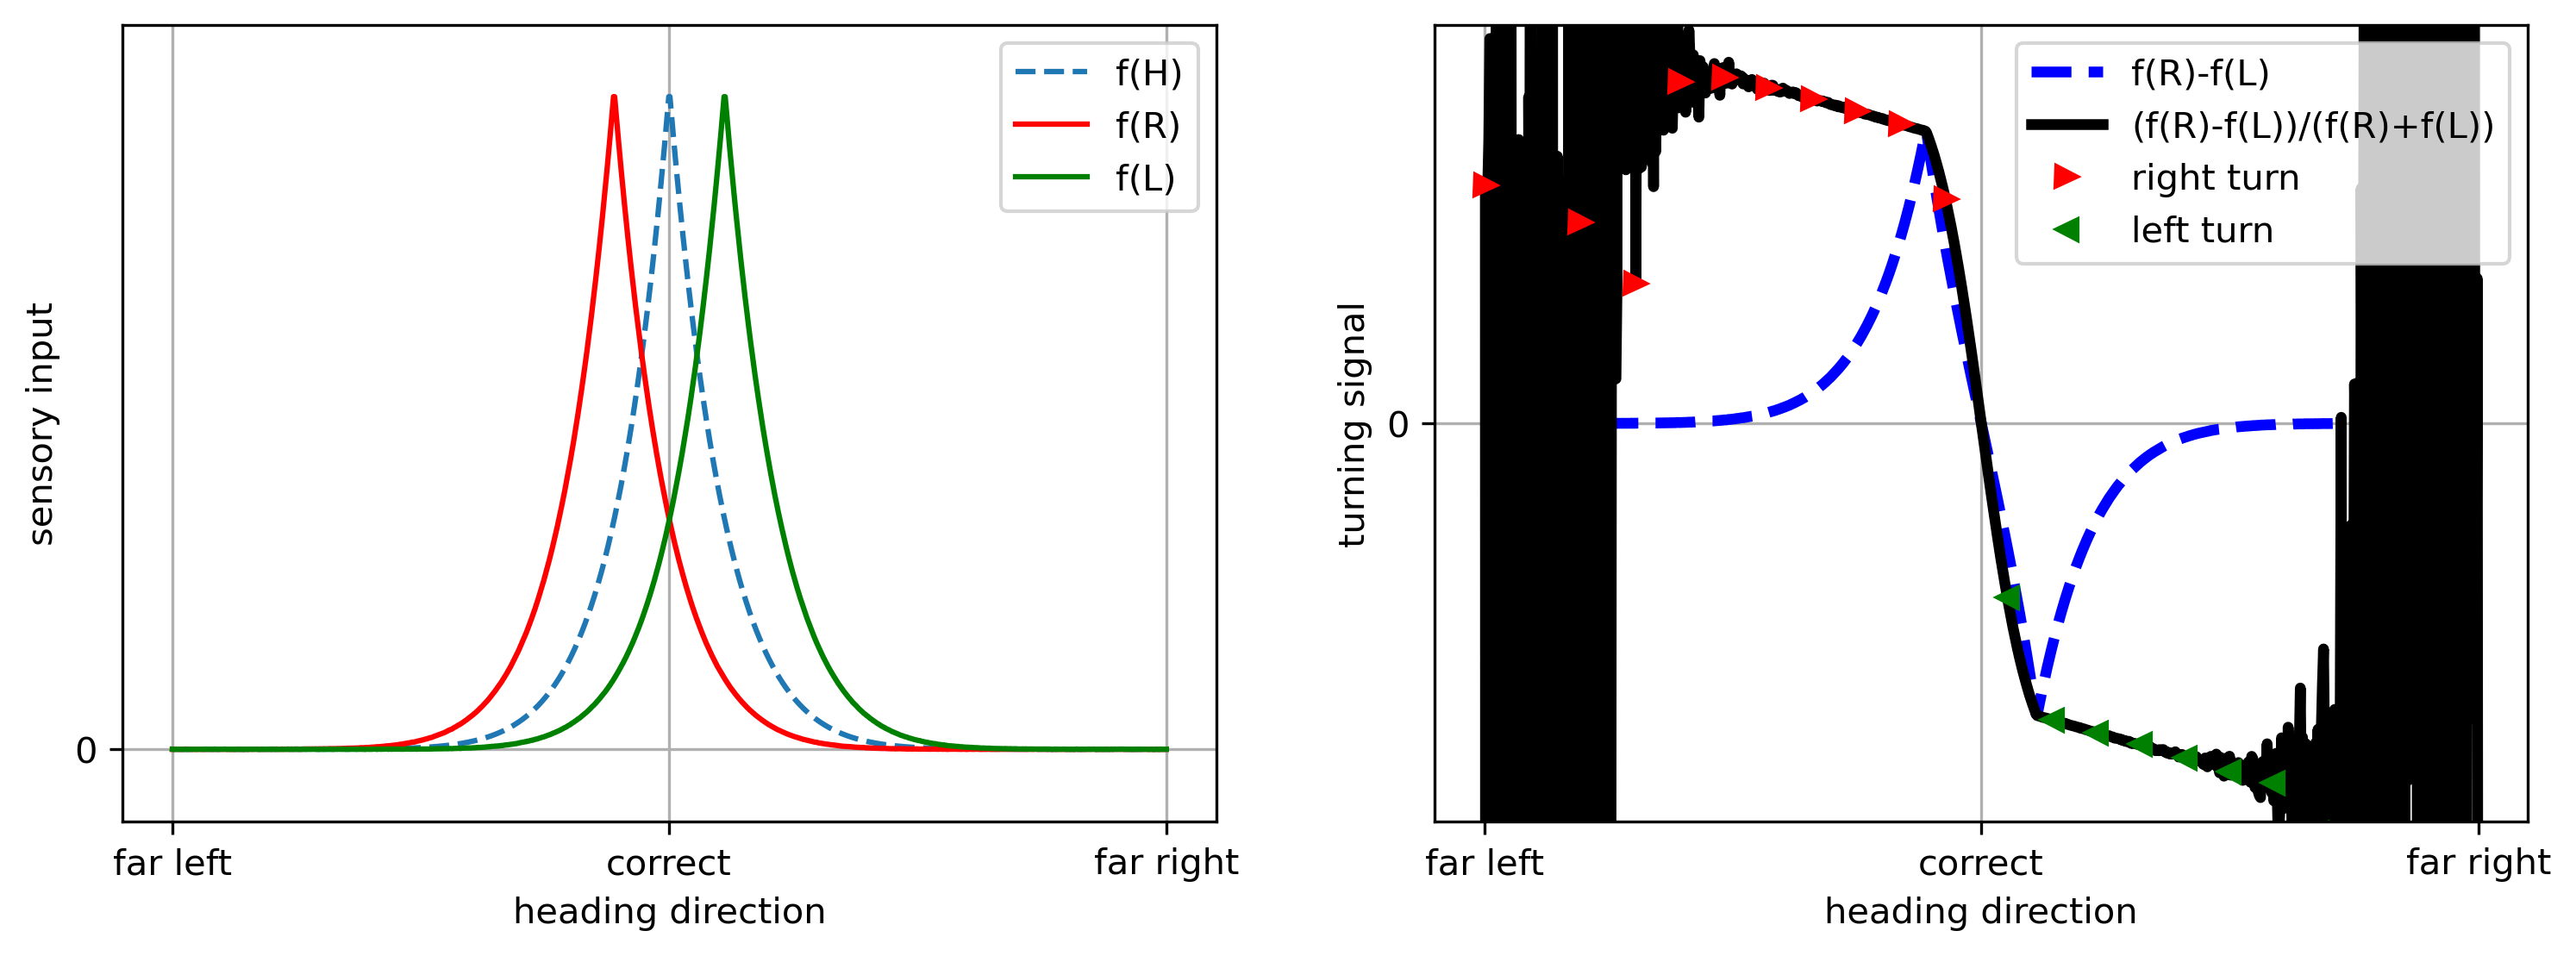

In [5]:
fig, ax = plt.subplot_mosaic('''ab''', figsize=(12, 4), dpi=300, sharex=True)

ax['a'].plot(y[offset // 2:-offset // 2], ls='dashed', label='f(H)')
ax['b'].plot(yd, c='b', lw=3, ls='dashed', label='f(R)-f(L)')

ax['a'].plot(yR, label='f(R)', c='r')
ax['a'].plot(yL, label='f(L)', c='g')

marker_sparsity = 40
rotation = yd/ys*c0
ax['b'].plot(rotation, c='k', lw=3, label='(f(R)-f(L))/(f(R)+f(L))')
ax['b'].plot(np.arange(900)[rotation>0][::marker_sparsity], rotation[rotation>0][::marker_sparsity], c='r', marker='>', ls='none', label='right turn')
ax['b'].plot(np.arange(900)[rotation<0][::marker_sparsity], rotation[rotation<0][::marker_sparsity], c='g', marker='<', ls='none', label='left turn')

for a in ax.values():
    a.set_xlabel('heading direction')
    a.legend()
    a.grid()
    a.set_yticks([0])
    # plt.yticks([-100, 0, 100, 200], [-1, 0, 1, 2])
    a.set_xticks([0, (1000 - offset) // 2 - 1, 999 - offset], ['far left', 'correct', 'far right'])
    
    

ax['a'].set_ylim(-c0/10, c0)
ax['b'].set_ylim(-c0*1.1, c0*1.1)

ax['a'].set_ylabel('sensory input')
ax['b'].set_ylabel('turning signal')